<a href="https://colab.research.google.com/github/Jefernee/Telecom-X-Latam-Analisis-de-datos/blob/main/TELECOM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar los datos desde la API y crear el DataFrame inicial

In [ ]:
# Título: Cargar los datos desde la API y crear el DataFrame inicial

import requests
import pandas as pd
import json

# URL "raw" del archivo JSON
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Realiza la solicitud a la API
response = requests.get(url)

# Verifica que la solicitud fue exitosa
if response.status_code == 200:
    # Lee los datos JSON
    try:
        data = json.loads(response.text)

        # Convierte los datos a un DataFrame de Pandas
        df = pd.DataFrame(data)

        # Imprime las primeras filas del DataFrame
        print(df.head())

    except json.JSONDecodeError as e:
        print("Error al decodificar el JSON:", e)
else:
    print("Error al obtener los datos de la API")

   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   
2  {'InternetService': 'Fiber optic', 'OnlineSecu...   
3  {'I

 Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [ ]:
# Título: Aplanar las columnas anidadas del DataFrame

import pandas as pd

# Verifica si el DataFrame 'df' existe
try:
    # Aplana la columna 'customer'
    customer_df = pd.json_normalize(df['customer'], sep='_')
    df = pd.concat([df, customer_df], axis=1)
    df.drop('customer', axis=1, inplace=True)

    # Aplana la columna 'phone'
    phone_df = pd.json_normalize(df['phone'], sep='_')
    df = pd.concat([df, phone_df], axis=1)
    df.drop('phone', axis=1, inplace=True)

    # Aplana la columna 'internet'
    internet_df = pd.json_normalize(df['internet'], sep='_')
    df = pd.concat([df, internet_df], axis=1)
    df.drop('internet', axis=1, inplace=True)

    # Aplana la columna 'account'
    account_df = pd.json_normalize(df['account'], sep='_')
    df = pd.concat([df, account_df], axis=1)
    df.drop('account', axis=1, inplace=True)

    # Imprime las primeras filas del DataFrame aplanado
    print(df.head())

except NameError:
    print("Error: El DataFrame 'df' no existe. Asegúrate de ejecutar el primer código antes de este.")

   customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... OnlineBackup  \
0          Yes            No             DSL  ...          Yes   
1          Yes           Yes             DSL  ...           No   
2          Yes            No     Fiber optic  ...           No   
3          Yes            No     Fiber optic  ...          Yes   
4          Yes            No     Fiber optic  ...           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No         Yes         Yes              No        One year   
1       

Explorar las columnas del dataset y verificar sus tipos de datos

Consultar el diccionario de datos (si está disponible) y mostrar los tipos de datos de cada columna:

Identificar las columnas más relevantes para el análisis de evasión:

In [ ]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Explorar las columnas y sus tipos de datos
    print("Información general del DataFrame:")
    df.info()

    print("\nPrimeras filas del DataFrame:")
    print(df.head())

    # Diccionario de datos (simulado)
    diccionario_datos = {
        'customerID': 'Identificador único del cliente',
        'gender': 'Género del cliente (Male/Female)',
        'SeniorCitizen': 'Indica si el cliente es un adulto mayor (0: No, 1: Sí)',
        'Partner': 'Indica si el cliente tiene pareja (Yes/No)',
        'Dependents': 'Indica si el cliente tiene dependientes (Yes/No)',
        'tenure': 'Número de meses que el cliente ha estado con la compañía',
        'PhoneService': 'Indica si el cliente tiene servicio telefónico (Yes/No)',
        'MultipleLines': 'Indica si el cliente tiene múltiples líneas telefónicas (Yes/No/No phone service)',
        'InternetService': 'Tipo de servicio de internet del cliente (DSL, Fiber optic, No)',
        'OnlineSecurity': 'Indica si el cliente tiene seguridad en línea (Yes/No/No internet service)',
        'OnlineBackup': 'Indica si el cliente tiene respaldo en línea (Yes/No/No internet service)',
        'DeviceProtection': 'Indica si el cliente tiene protección de dispositivo (Yes/No/No internet service)',
        'TechSupport': 'Indica si el cliente tiene soporte técnico (Yes/No/No internet service)',
        'StreamingTV': 'Indica si el cliente tiene servicio de streaming de TV (Yes/No/No internet service)',
        'StreamingMovies': 'Indica si el cliente tiene servicio de streaming de películas (Yes/No/No internet service)',
        'Contract': 'Tipo de contrato del cliente (Month-to-month, One year, Two year)',
        'PaperlessBilling': 'Indica si el cliente tiene facturación electrónica (Yes/No)',
        'PaymentMethod': 'Método de pago del cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))',
        'MonthlyCharges': 'Cargo mensual del cliente',
        'TotalCharges': 'Cargo total del cliente',
        'Churn': 'Indica si el cliente se ha dado de baja (Yes/No)'
    }

    print("\nDiccionario de datos (ejemplo):")
    for columna, descripcion in diccionario_datos.items():
        print(f"- {columna}: {descripcion}")

    # Identificar columnas relevantes para el análisis de evasión (Churn)
    columnas_relevantes = [
        'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'MonthlyCharges', 'TotalCharges', 'Churn'
    ]

    print("\nColumnas relevantes para el análisis de evasión:")
    print(columnas_relevantes)

except Exception as e:
    print(f"Ocurrió un error al cargar los datos desde la URL: {e}")

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Primeras filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                     

Verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías.

In [ ]:
import json
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el JSON desde la URL
    import urllib.request
    with urllib.request.urlopen(url) as response:
        data = json.load(response)

    # Imprimir el tipo de datos del objeto cargado
    print("Tipo de datos del objeto cargado:", type(data))

    # Si es un diccionario, imprimir las primeras claves
    if isinstance(data, dict):
        print("Primeras claves del diccionario:", list(data.keys())[:5])

    # Si es una lista, imprimir el tipo de datos del primer elemento
    elif isinstance(data, list):
        print("Tipo de datos del primer elemento de la lista:", type(data[0]))
        if isinstance(data[0], dict):
            print("Primeras claves del primer diccionario:", list(data[0].keys())[:5])

    # Intentar cargar el JSON en un DataFrame de Pandas
    df = pd.DataFrame(data)

    # Imprimir información del DataFrame
    print("\nInformación general del DataFrame:")
    df.info()

    print("\nPrimeras filas del DataFrame:")
    print(df.head())

except Exception as e:
    print(f"Ocurrió un error al cargar o verificar los datos: {e}")

Tipo de datos del objeto cargado: <class 'list'>
Tipo de datos del primer elemento de la lista: <class 'dict'>
Primeras claves del primer diccionario: ['customerID', 'Churn', 'customer', 'phone', 'internet']

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

Primeras filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Ma

Ahora que has identificado las inconsistencias, es momento de aplicar las correcciones necesarias. Ajusta los datos para asegurarte de que estén completos y coherentes, preparándolos para las siguientes etapas del análisis.

In [26]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Imprimir información del DataFrame transformado
    print("Información general del DataFrame transformado:")
    df.info()

    print("\nPrimeras filas del DataFrame transformado:")
    print(df.head())

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
    print("\nValores ausentes en 'Charges.Total' después de la conversión:", df['Charges.Total'].isnull().sum())

    # Imprimir estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")

Información general del DataFrame transformado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 

In [27]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
    print("\nValores ausentes en 'Charges.Total' después de la conversión:", df['Charges.Total'].isnull().sum())

    # 1. Verificar valores ausentes
    print("\nValores ausentes por columna:")
    print(df.isnull().sum())
    print("\nTotal de valores ausentes:", df.isnull().sum().sum())

    # 2. Verificar duplicados
    print("\nNúmero de filas duplicadas:", df.duplicated().sum())

    # Imprimir información del DataFrame transformado
    print("\nInformación general del DataFrame transformado:")
    df.info()

    print("\nPrimeras filas del DataFrame transformado:")
    print(df.head())

    # Imprimir estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")


Valores ausentes en 'Charges.Total' después de la conversión: 11

Valores ausentes por columna:
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

Total de valores ausentes: 11

Número de filas duplicadas: 0

Información general del DataFrame transformado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 

In [28]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
    print("\nValores ausentes en 'Charges.Total' después de la conversión:", df['Charges.Total'].isnull().sum())

    # Imputar valores ausentes en 'Charges.Total' con la mediana
    mediana_total_charges = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana_total_charges, inplace=True)
    print("\nValores ausentes en 'Charges.Total' después de la imputación:", df['Charges.Total'].isnull().sum())

    # 1. Verificar valores ausentes
    print("\nValores ausentes por columna:")
    print(df.isnull().sum())
    print("\nTotal de valores ausentes:", df.isnull().sum().sum())

    # 2. Verificar duplicados
    print("\nNúmero de filas duplicadas:", df.duplicated().sum())

    # Imprimir información del DataFrame transformado
    print("\nInformación general del DataFrame transformado:")
    df.info()

    print("\nPrimeras filas del DataFrame transformado:")
    print(df.head())

    # Imprimir estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")


Valores ausentes en 'Charges.Total' después de la conversión: 11

Valores ausentes en 'Charges.Total' después de la imputación: 0

Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Total de valores ausentes: 0

Número de filas duplicadas: 0

Información general del DataFrame transformado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   

/tmp/ipython-input-3647584338.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana_total_charges, inplace=True)


        customerID Churn gender  SeniorCitizen Partner Dependents  \
count         7267  7267   7267    7267.000000    7267       7267   
unique        7267     3      2            NaN       2          2   
top     9995-HOTOH    No   Male            NaN      No         No   
freq             1  5174   3675            NaN    3749       5086   
mean           NaN   NaN    NaN       0.162653     NaN        NaN   
std            NaN   NaN    NaN       0.369074     NaN        NaN   
min            NaN   NaN    NaN       0.000000     NaN        NaN   
25%            NaN   NaN    NaN       0.000000     NaN        NaN   
50%            NaN   NaN    NaN       0.000000     NaN        NaN   
75%            NaN   NaN    NaN       0.000000     NaN        NaN   
max            NaN   NaN    NaN       1.000000     NaN        NaN   

             tenure PhoneService MultipleLines InternetService  ...  \
count   7267.000000         7267          7267            7267  ...   
unique          NaN          

In [29]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

    # Imputar valores ausentes en 'Charges.Total' con la mediana
    mediana_total_charges = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana_total_charges, inplace=True)

    # 1. Verificar valores ausentes
    print("\nValores ausentes por columna:")
    print(df.isnull().sum())
    print("\nTotal de valores ausentes:", df.isnull().sum().sum())

    # 2. Verificar duplicados
    print("\nNúmero de filas duplicadas:", df.duplicated().sum())

    # 3. Verificar inconsistencias en las categorías
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    print("\nValores únicos por columna categórica:")
    for columna in columnas_categoricas:
        print(f"\nColumna: {columna}")
        print(df[columna].unique())

    # Imprimir información del DataFrame transformado
    print("\nInformación general del DataFrame transformado:")
    df.info()

    print("\nPrimeras filas del DataFrame transformado:")
    print(df.head())

    # Imprimir estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")

/tmp/ipython-input-110441008.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana_total_charges, inplace=True)



Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Total de valores ausentes: 0

Número de filas duplicadas: 0

Valores únicos por columna categórica:

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['No' 'Yes' '']

Columna: gender
['Female' 'Male']

Columna: Partner
['Yes' 'No']

Columna: Dependents
['Yes' 'No']

Columna: PhoneService
['Yes' 'No']

Columna: MultipleLines
['No' 'Yes' 'No phone service']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: 

In [30]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

    # Imputar valores ausentes en 'Charges.Total' con la mediana
    mediana_total_charges = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana_total_charges, inplace=True)

    # Corregir inconsistencias en la columna 'Churn'
    df['Churn'] = df['Churn'].replace('', 'No')

    # 1. Verificar valores ausentes
    print("\nValores ausentes por columna:")
    print(df.isnull().sum())
    print("\nTotal de valores ausentes:", df.isnull().sum().sum())

    # 2. Verificar duplicados
    print("\nNúmero de filas duplicadas:", df.duplicated().sum())

    # 3. Verificar inconsistencias en las categorías
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    print("\nValores únicos por columna categórica:")
    for columna in columnas_categoricas:
        print(f"\nColumna: {columna}")
        print(df[columna].unique())

    # Imprimir información del DataFrame transformado
    print("\nInformación general del DataFrame transformado:")
    df.info()

    print("\nPrimeras filas del DataFrame transformado:")
    print(df.head())

    # Imprimir estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")

/tmp/ipython-input-3979680966.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana_total_charges, inplace=True)



Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Total de valores ausentes: 0

Número de filas duplicadas: 0

Valores únicos por columna categórica:

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['No' 'Yes']

Columna: gender
['Female' 'Male']

Columna: Partner
['Yes' 'No']

Columna: Dependents
['Yes' 'No']

Columna: PhoneService
['Yes' 'No']

Columna: MultipleLines
['No' 'Yes' 'No phone service']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: Onl

In [31]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

    # Imputar valores ausentes en 'Charges.Total' con la mediana
    mediana_total_charges = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana_total_charges, inplace=True)

    # Corregir inconsistencias en la columna 'Churn'
    df['Churn'] = df['Churn'].replace('', 'No')

    # Agrupar 'No internet service' y 'No phone service' con 'No'
    cols_to_replace = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in cols_to_replace:
        df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

    # 1. Verificar valores ausentes
    print("\nValores ausentes por columna:")
    print(df.isnull().sum())
    print("\nTotal de valores ausentes:", df.isnull().sum().sum())

    # 2. Verificar duplicados
    print("\nNúmero de filas duplicadas:", df.duplicated().sum())

    # 3. Verificar inconsistencias en las categorías
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    print("\nValores únicos por columna categórica:")
    for columna in columnas_categoricas:
        print(f"\nColumna: {columna}")
        print(df[columna].unique())

    # Imprimir información del DataFrame transformado
    print("\nInformación general del DataFrame transformado:")
    df.info()

    print("\nPrimeras filas del DataFrame transformado:")
    print(df.head())

    # Imprimir estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")

/tmp/ipython-input-3812517886.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana_total_charges, inplace=True)



Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Total de valores ausentes: 0

Número de filas duplicadas: 0

Valores únicos por columna categórica:

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: Churn
['No' 'Yes']

Columna: gender
['Female' 'Male']

Columna: Partner
['Yes' 'No']

Columna: Dependents
['Yes' 'No']

Columna: PhoneService
['Yes' 'No']

Columna: MultipleLines
['No' 'Yes']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: OnlineSecurity
['No' '

In [32]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

    # Imputar valores ausentes en 'Charges.Total' con la mediana
    mediana_total_charges = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana_total_charges, inplace=True)

    # Corregir inconsistencias en la columna 'Churn'
    df['Churn'] = df['Churn'].replace('', 'No')

    # Agrupar 'No internet service' y 'No phone service' con 'No'
    cols_to_replace = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in cols_to_replace:
        df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

    # Convertir columnas con 'Yes' y 'No' a booleanos
    cols_to_bool = [
        'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
    ]
    for col in cols_to_bool:
        df[col] = df[col].replace({'Yes': True, 'No': False})

    # 1. Verificar valores ausentes
    print("\nValores ausentes por columna:")
    print(df.isnull().sum())
    print("\nTotal de valores ausentes:", df.isnull().sum().sum())

    # 2. Verificar duplicados
    print("\nNúmero de filas duplicadas:", df.duplicated().sum())

    # 3. Verificar inconsistencias en las categorías
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    print("\nValores únicos por columna categórica:")
    for columna in columnas_categoricas:
        print(f"\nColumna: {columna}")
        print(df[columna].unique())

    # Imprimir información del DataFrame transformado
    print("\nInformación general del DataFrame transformado:")
    df.info()

    print("\nPrimeras filas del DataFrame transformado:")
    print(df.head())

    # Imprimir estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")


Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Total de valores ausentes: 0

Número de filas duplicadas: 0

Valores únicos por columna categórica:

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: gender
['Female' 'Male']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: Contract
['One year' 'Month-to-month' 'Two year']

Columna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Información general del

/tmp/ipython-input-2147608258.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana_total_charges, inplace=True)
/tmp/ipython-input-2147608258.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': True, 'No': False})


In [34]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

    # Imputar valores ausentes en 'Charges.Total' con la mediana
    mediana_total_charges = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana_total_charges, inplace=True)

    # Corregir inconsistencias en la columna 'Churn'
    df['Churn'] = df['Churn'].replace('', 'No')

    # Agrupar 'No internet service' y 'No phone service' con 'No'
    cols_to_replace = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in cols_to_replace:
        df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

    # Convertir columnas con 'Yes' y 'No' a booleanos
    cols_to_bool = [
        'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
    ]
    for col in cols_to_bool:
        df[col] = df[col].replace({'Yes': True, 'No': False})

    # Calcular los cargos diarios
    df['Cargos_Diarios'] = df['Charges.Monthly'] / 30

    # 1. Verificar valores ausentes
    print("\nValores ausentes por columna:")
    print(df.isnull().sum())
    print("\nTotal de valores ausentes:", df.isnull().sum().sum())

    # 2. Verificar duplicados
    print("\nNúmero de filas duplicadas:", df.duplicated().sum())

    # 3. Verificar inconsistencias en las categorías
    columnas_categoricas = df.select_dtypes(include=['object']).columns
    print("\nValores únicos por columna categórica:")
    for columna in columnas_categoricas:
        print(f"\nColumna: {columna}")
        print(df[columna].unique())

    # Imprimir información del DataFrame transformado
    print("\nInformación general del DataFrame transformado:")
    df.info()

    print("\nPrimeras filas del DataFrame transformado:")
    print(df.head())

    # Imprimir estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")

/tmp/ipython-input-3086218867.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana_total_charges, inplace=True)
/tmp/ipython-input-3086218867.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': True, 'No': False})



Valores ausentes por columna:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
Cargos_Diarios      0
dtype: int64

Total de valores ausentes: 0

Número de filas duplicadas: 0

Valores únicos por columna categórica:

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']

Columna: gender
['Female' 'Male']

Columna: InternetService
['DSL' 'Fiber optic' 'No']

Columna: Contract
['One year' 'Month-to-month' 'Two year']

Columna: PaymentMethod
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

I

In [35]:
pip install matplotlib seaborn

In [36]:
import pandas as pd

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

    # Imputar valores ausentes en 'Charges.Total' con la mediana
    mediana_total_charges = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana_total_charges, inplace=True)

    # Corregir inconsistencias en la columna 'Churn'
    df['Churn'] = df['Churn'].replace('', 'No')

    # Agrupar 'No internet service' y 'No phone service' con 'No'
    cols_to_replace = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in cols_to_replace:
        df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

    # Convertir columnas con 'Yes' y 'No' a booleanos
    cols_to_bool = [
        'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
    ]
    for col in cols_to_bool:
        df[col] = df[col].replace({'Yes': True, 'No': False})

    # Calcular los cargos diarios
    df['Cargos_Diarios'] = df['Charges.Monthly'] / 30

    # Imprimir estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    print(df.describe(include='all'))

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")


Estadísticas descriptivas:
        customerID  Churn gender  SeniorCitizen Partner Dependents  \
count         7267   7267   7267    7267.000000    7267       7267   
unique        7267      2      2            NaN       2          2   
top     9995-HOTOH  False   Male            NaN   False      False   
freq             1   5398   3675            NaN    3749       5086   
mean           NaN    NaN    NaN       0.162653     NaN        NaN   
std            NaN    NaN    NaN       0.369074     NaN        NaN   
min            NaN    NaN    NaN       0.000000     NaN        NaN   
25%            NaN    NaN    NaN       0.000000     NaN        NaN   
50%            NaN    NaN    NaN       0.000000     NaN        NaN   
75%            NaN    NaN    NaN       0.000000     NaN        NaN   
max            NaN    NaN    NaN       1.000000     NaN        NaN   

             tenure PhoneService MultipleLines InternetService  ...  \
count   7267.000000         7267          7267            72

/tmp/ipython-input-1424315717.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana_total_charges, inplace=True)
/tmp/ipython-input-1424315717.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': True, 'No': False})


In [38]:
# Calcular la media de la columna 'Charges.Monthly'
media_cargos_mensuales = df['Charges.Monthly'].mean()
print(f"La media de los cargos mensuales es: {media_cargos_mensuales}")

# Calcular la mediana de la columna 'tenure'
mediana_tenure = df['tenure'].median()
print(f"La mediana de la antigüedad es: {mediana_tenure}")

# Calcular la desviación estándar de la columna 'Charges.Total'
desviacion_estandar_cargos_totales = df['Charges.Total'].std()
print(f"La desviación estándar de los cargos totales es: {desviacion_estandar_cargos_totales}")

La media de los cargos mensuales es: 64.72009770194028
La mediana de la antigüedad es: 29.0
La desviación estándar de los cargos totales es: 2267.1789632993236


/tmp/ipython-input-2321150511.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana_total_charges, inplace=True)
/tmp/ipython-input-2321150511.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': True, 'No': False})


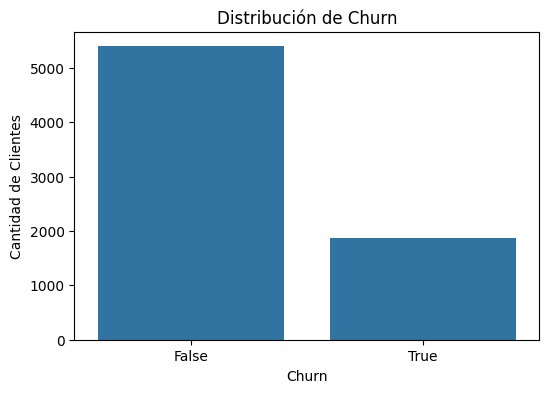

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

    # Imputar valores ausentes en 'Charges.Total' con la mediana
    mediana_total_charges = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana_total_charges, inplace=True)

    # Corregir inconsistencias en la columna 'Churn'
    df['Churn'] = df['Churn'].replace('', 'No')

    # Agrupar 'No internet service' y 'No phone service' con 'No'
    cols_to_replace = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in cols_to_replace:
        df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

    # Convertir columnas con 'Yes' y 'No' a booleanos
    cols_to_bool = [
        'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
    ]
    for col in cols_to_bool:
        df[col] = df[col].replace({'Yes': True, 'No': False})

    # Calcular los cargos diarios
    df['Cargos_Diarios'] = df['Charges.Monthly'] / 30

    # Visualizar la distribución de Churn
    churn_counts = df['Churn'].value_counts()
    plt.figure(figsize=(6, 4))
    sns.barplot(x=churn_counts.index, y=churn_counts.values)
    plt.title('Distribución de Churn')
    plt.xlabel('Churn')
    plt.ylabel('Cantidad de Clientes')
    plt.show()

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")

/tmp/ipython-input-3460962235.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana_total_charges, inplace=True)
/tmp/ipython-input-3460962235.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': True, 'No': False})


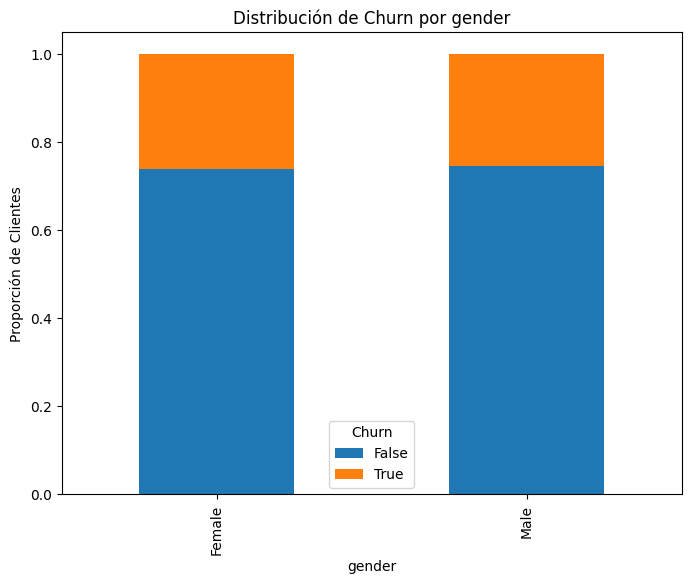

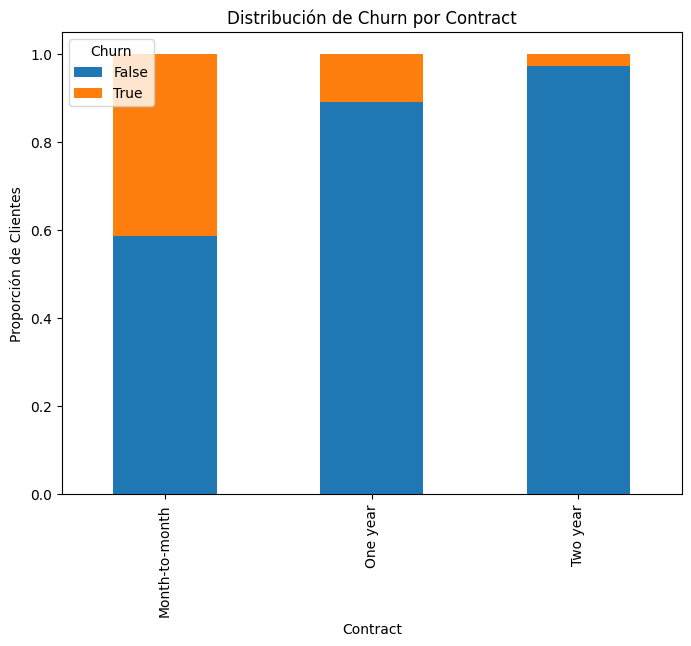

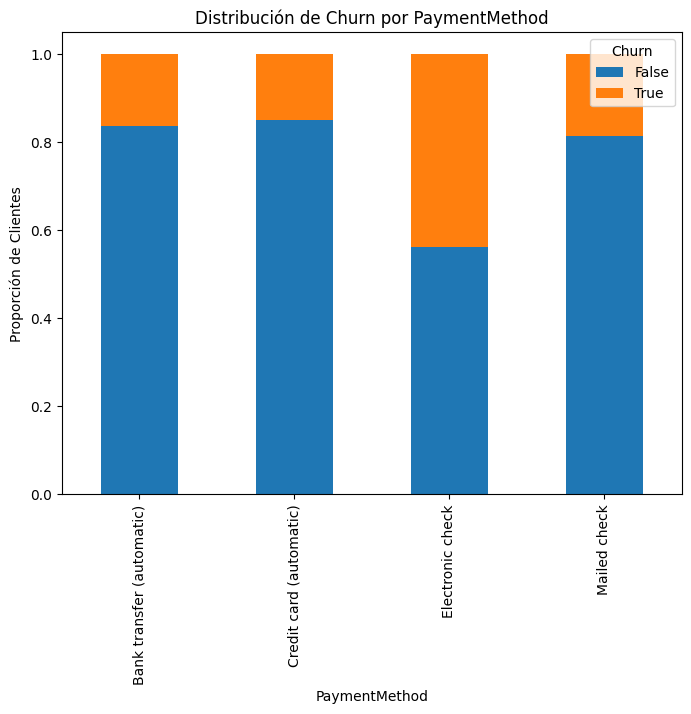

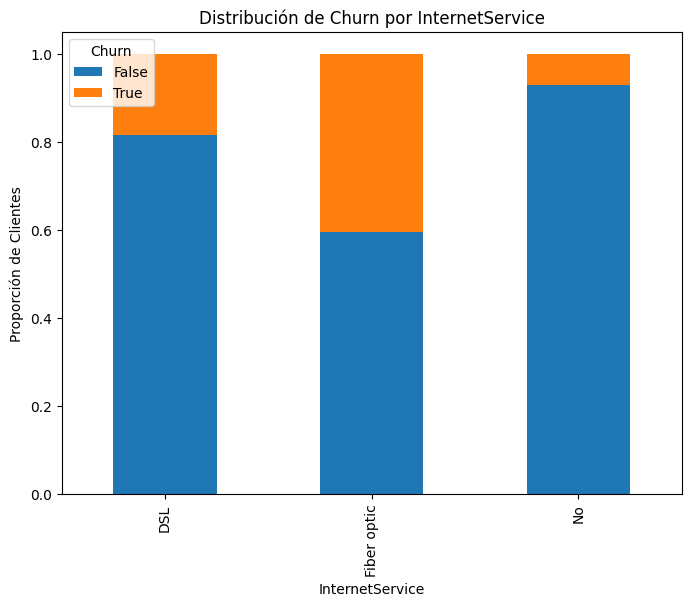

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

    # Imputar valores ausentes en 'Charges.Total' con la mediana
    mediana_total_charges = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana_total_charges, inplace=True)

    # Corregir inconsistencias en la columna 'Churn'
    df['Churn'] = df['Churn'].replace('', 'No')

    # Agrupar 'No internet service' y 'No phone service' con 'No'
    cols_to_replace = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in cols_to_replace:
        df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

    # Convertir columnas con 'Yes' y 'No' a booleanos
    cols_to_bool = [
        'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
    ]
    for col in cols_to_bool:
        df[col] = df[col].replace({'Yes': True, 'No': False})

    # Calcular los cargos diarios
    df['Cargos_Diarios'] = df['Charges.Monthly'] / 30

    # Lista de columnas categóricas a analizar
    categorical_cols = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

    # Crear gráficos de barras apiladas para cada columna categórica
    for col in categorical_cols:
        # Crear tabla de contingencia
        contingency_table = pd.crosstab(df[col], df['Churn'], normalize='index')

        # Crear gráfico de barras apiladas
        contingency_table.plot(kind='bar', stacked=True, figsize=(8, 6))
        plt.title(f'Distribución de Churn por {col}')
        plt.xlabel(col)
        plt.ylabel('Proporción de Clientes')
        plt.show()

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")

/tmp/ipython-input-738970935.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Charges.Total'].fillna(mediana_total_charges, inplace=True)
/tmp/ipython-input-738970935.py:53: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': True, 'No': False})


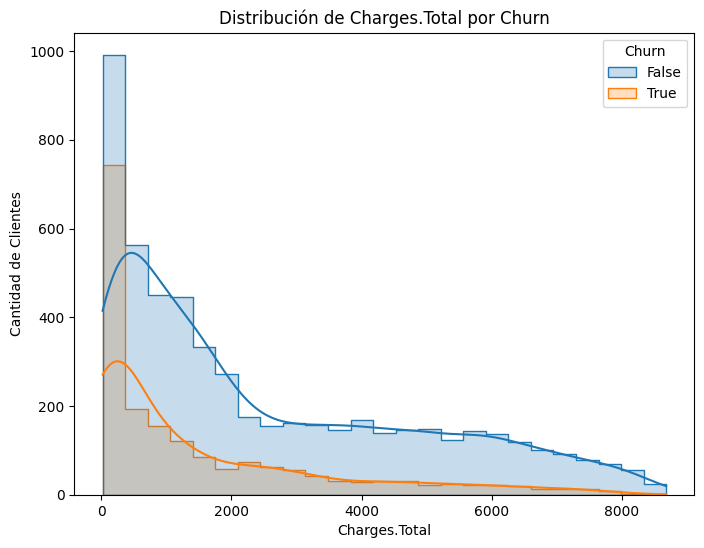

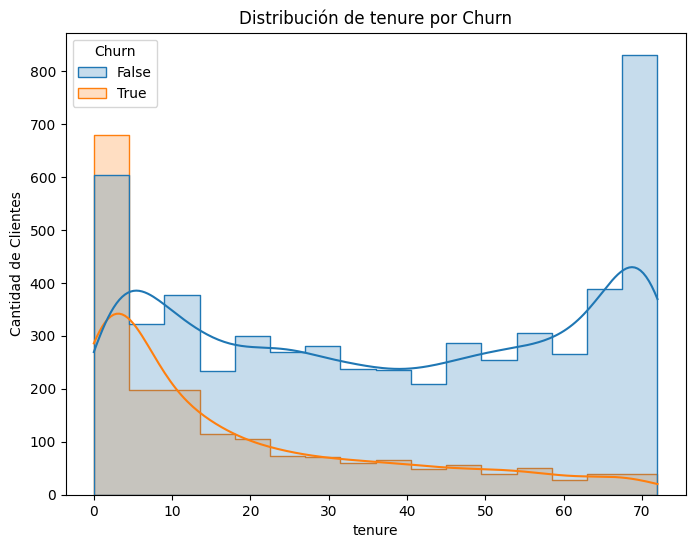

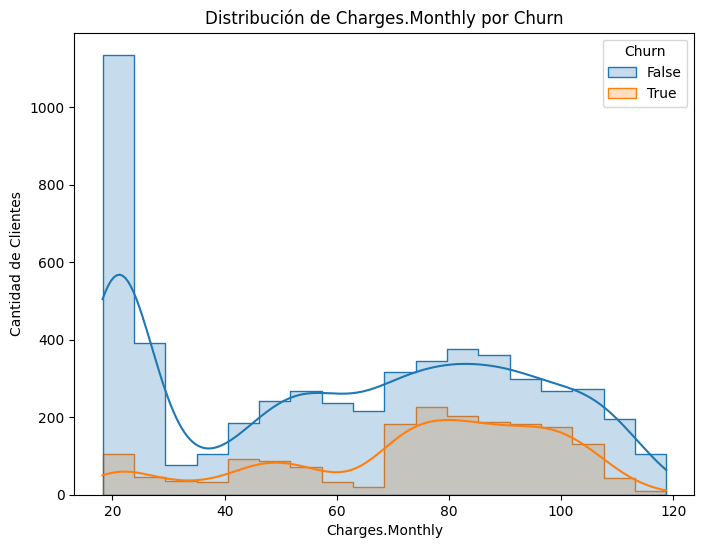

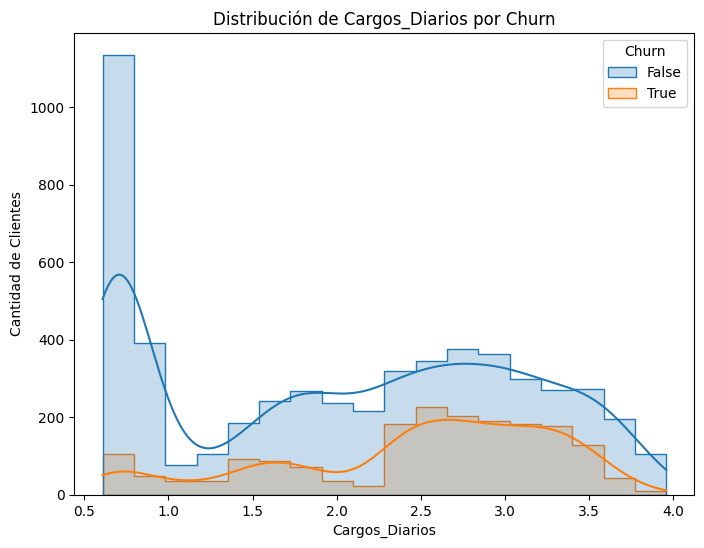

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL del archivo JSON
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json'

try:
    # Cargar el DataFrame desde la URL
    df = pd.read_json(url)

    # Función para expandir diccionarios en columnas
    def expand_dictionary_columns(df, column):
        # Crear nuevas columnas para cada clave en el diccionario
        expanded_df = pd.json_normalize(df[column])
        # Unir las nuevas columnas al DataFrame original
        df = pd.concat([df, expanded_df], axis=1)
        # Eliminar la columna original con el diccionario
        df = df.drop(column, axis=1)
        return df

    # Expandir las columnas con diccionarios
    df = expand_dictionary_columns(df, 'customer')
    df = expand_dictionary_columns(df, 'phone')
    df = expand_dictionary_columns(df, 'internet')
    df = expand_dictionary_columns(df, 'account')

    # Convertir 'Charges.Total' a numérico, manejando errores
    df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')

    # Imputar valores ausentes en 'Charges.Total' con la mediana
    mediana_total_charges = df['Charges.Total'].median()
    df['Charges.Total'].fillna(mediana_total_charges, inplace=True)

    # Corregir inconsistencias en la columna 'Churn'
    df['Churn'] = df['Churn'].replace('', 'No')

    # Agrupar 'No internet service' y 'No phone service' con 'No'
    cols_to_replace = [
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
    ]
    for col in cols_to_replace:
        df[col] = df[col].replace(['No internet service', 'No phone service'], 'No')

    # Convertir columnas con 'Yes' y 'No' a booleanos
    cols_to_bool = [
        'Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
        'StreamingTV', 'StreamingMovies', 'PaperlessBilling'
    ]
    for col in cols_to_bool:
        df[col] = df[col].replace({'Yes': True, 'No': False})

    # Calcular los cargos diarios
    df['Cargos_Diarios'] = df['Charges.Monthly'] / 30

    # Lista de columnas numéricas a analizar
    numerical_cols = ['Charges.Total', 'tenure', 'Charges.Monthly', 'Cargos_Diarios']

    # Crear histogramas para cada columna numérica
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=col, hue='Churn', kde=True, element="step")
        plt.title(f'Distribución de {col} por Churn')
        plt.xlabel(col)
        plt.ylabel('Cantidad de Clientes')
        plt.show()

except Exception as e:
    print(f"Ocurrió un error al cargar o transformar los datos: {e}")

1. Introducción

El objetivo de este análisis es comprender los factores que contribuyen a la evasión de clientes (Churn) en la empresa TelecomX. La evasión de clientes representa una pérdida significativa de ingresos y afecta la rentabilidad de la empresa. Este informe busca identificar patrones y tendencias que permitan desarrollar estrategias para reducir la tasa de evasión.

2. Limpieza y Tratamiento de Datos

Los datos fueron importados desde la siguiente URL: https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json. Se realizaron los siguientes pasos de limpieza y tratamiento:

Expansión de columnas con diccionarios: 'customer', 'phone', 'internet', 'account'
Conversión de la columna 'Charges.Total' a tipo numérico, imputando valores ausentes con la mediana.
Corrección de inconsistencias en la columna 'Churn'.
Agrupación de valores 'No internet service' y 'No phone service' con 'No' en las columnas correspondientes.
Conversión de columnas con valores 'Yes' y 'No' a booleanos (True/False).
Creación de la columna 'Cargos_Diarios' para analizar el gasto diario de los clientes.
3. Análisis Exploratorio de Datos

Se realizó un análisis exploratorio de los datos para identificar patrones y tendencias relacionados con la evasión de clientes. Se utilizaron las siguientes visualizaciones:

Distribución de Churn: Gráfico de barras que muestra la proporción de clientes que se dieron de baja y los que permanecieron.
Distribución de Churn por variables categóricas (género, tipo de contrato, método de pago, servicio de internet): Gráficos de barras apiladas que muestran la proporción de clientes que se dieron de baja y los que permanecieron para cada categoría de las variables.
Distribución de Churn por variables numéricas (total gastado, tiempo de contrato, cargos mensuales, cargos diarios): Histogramas que muestran la distribución de las variables numéricas para los clientes que se dieron de baja y los que permanecieron.
4. Conclusiones e Insights

El análisis exploratorio de datos reveló los siguientes hallazgos:

Tipo de Contrato: Los clientes con contratos de mes a mes tienen una mayor probabilidad de darse de baja en comparación con los clientes con contratos a largo plazo (uno o dos años).
Servicio de Internet: Los clientes con servicio de fibra óptica tienen una mayor tasa de evasión en comparación con los clientes con DSL.
Antigüedad (Tenure): Los clientes con menor antigüedad (menos meses de contrato) tienen una mayor probabilidad de darse de baja.
Cargos Mensuales: Los clientes con cargos mensuales más altos tienden a tener una mayor tasa de evasión.
Estos hallazgos sugieren que la flexibilidad de los contratos de mes a mes, los problemas con el servicio de fibra óptica, la falta de fidelización de los clientes nuevos y los altos costos mensuales son factores que contribuyen a la evasión de clientes.

5. Recomendaciones

Basado en el análisis realizado, se recomiendan las siguientes estrategias para reducir la evasión de clientes:

Ofrecer incentivos para contratos a largo plazo: Implementar descuentos y beneficios para los clientes que elijan contratos de uno o dos años, incentivando la fidelización.
Mejorar la calidad del servicio de fibra óptica: Investigar y solucionar los problemas técnicos que puedan estar afectando la satisfacción de los clientes con servicio de fibra óptica.
Implementar programas de fidelización para clientes nuevos: Ofrecer descuentos y promociones especiales para los clientes durante sus primeros meses de contrato, incentivando la permanencia.
Revisar la estructura de precios: Analizar la estructura de precios y ofrecer opciones más accesibles para los clientes sensibles al precio.
Mejorar la comunicación con los clientes: Implementar encuestas de satisfacción y canales de comunicación efectivos para identificar y solucionar problemas antes de que los clientes decidan darse de baja.
Al implementar estas estrategias, la empresa TelecomX puede reducir la tasa de evasión de clientes y mejorar su rentabilidad a largo plazo.